In [1]:
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In [24]:
df = pd.read_csv("Cosmetics_data_2019.csv")

df.shape

(250000, 36)

In [3]:
### START CODE HERE ###
X  = df.iloc[:,2:-1].values
y  = df.iloc[:,-1].values
df = df.drop(columns=['user_id','product_id'])
### END CODE HERE ###
# Display the first few rows of the modified DataFrame
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase
0,2,2,4749,19.03,19.03,0,1,1,1,2,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,4.60,4.60,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,1,1,0,35.71,35.71,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,2.94,2.94,1,0,0,13,13,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,5.22,5.22,0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0


Feature ranking:
1. feature 7 (0.171403)
2. feature 0 (0.168439)
3. feature 5 (0.117723)
4. feature 6 (0.101453)
5. feature 2 (0.082864)
6. feature 1 (0.062956)
7. feature 10 (0.054205)
8. feature 8 (0.053166)
9. feature 4 (0.044448)
10. feature 3 (0.042576)
11. feature 9 (0.042194)
12. feature 18 (0.004516)
13. feature 26 (0.004165)
14. feature 16 (0.004153)
15. feature 13 (0.004037)
16. feature 15 (0.003799)
17. feature 12 (0.003794)
18. feature 14 (0.003670)
19. feature 28 (0.003655)
20. feature 17 (0.003609)
21. feature 27 (0.002778)
22. feature 31 (0.002557)
23. feature 29 (0.002411)
24. feature 32 (0.002275)
25. feature 25 (0.002271)
26. feature 30 (0.002067)
27. feature 23 (0.001911)
28. feature 21 (0.001789)
29. feature 22 (0.001690)
30. feature 24 (0.001622)
31. feature 19 (0.000926)
32. feature 20 (0.000880)
33. feature 11 (0.000000)


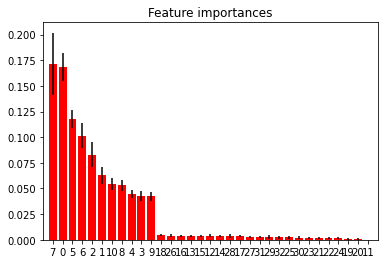

In [5]:
from helper_functions import *
indices, importances = return_feature_rank_from_RF(X,y)

In [6]:
# Extract the indices corresponding to a feature importance > 0.025
idx = np.where(importances > 0.025)
# Extract the names of the associated feature columns
selected_columns = df.columns[idx]
### END CODE HERE ###
print(idx)
print(selected_columns)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),)
Index(['NumOfEventsInJourney', 'NumSessions', 'interactionTime', 'maxPrice',
       'minPrice', 'NumCart', 'NumView', 'NumRemove', 'InsessionCart',
       'InsessionView', 'InsessionRemove'],
      dtype='object')


In [21]:
### START CODE HERE ###
X_train = df[selected_columns]
y_train = y
### END CODE HERE ###
print(X_train.shape)

(250000, 11)


In [8]:
import sklearn.manifold
### START CODE HERE ###
tsne_op = sklearn.manifold.TSNE(n_components=3, perplexity=2)
X_red_t = np.array(tsne_op.fit_transform(X_train))
### END CODE HERE ###

In [9]:
X_red_t.shape

(250000, 3)

/usr/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


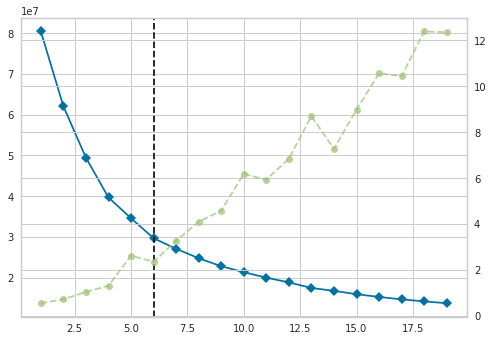

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
# Fit the visualizer to the reduced features data
visualizer.fit(X_red_t)

In [13]:
#Enter the optimal number of clusters here from the Elbow method
n = 3
# Instantiate the clustering model
clusters = KMeans(n_clusters = n)
# Assign the points in the reduced dataset to clusters
C_vals = np.array(clusters.fit_predict(X_red_t))
### END CODE HERE ###
print(np.unique(C_vals))

[0 1 2]


In [14]:
X_save = pd.DataFrame(df[selected_columns]))
X_save['Purchase'] = df.iloc[:,-1]
X_save['ClusterID'] = C_vals
X_save.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,InsessionRemove,Purchase,ClusterID
0,2,2,4749,19.03,19.03,0,1,1,1,2,6,0,2
1,1,1,0,4.60,4.60,0,1,0,0,1,0,0,0
2,1,1,0,35.71,35.71,0,1,0,0,1,0,0,0
3,1,1,0,2.94,2.94,1,0,0,13,13,16,0,2
4,1,1,0,5.22,5.22,0,1,0,0,3,0,0,2


In [15]:
X_save.to_csv('Clustered_data_cosmetics_tsne3.csv', index=False)

In [26]:
X_train = pd.read_csv('Clustered_data_cosmetics_tsne3.csv')

In [27]:
# Get all the values in the 'ClusterID' column
column_values = X_train['ClusterID']
# Compute the unique cluster ID values
unique_values_a = np.unique(C_vals)
# Sort the unique cluster ID values
unique_values = np.sort(unique_values_a)
### END CODE HERE ###
print(unique_values)

[0 1 2]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Feature ranking:
1. feature 11 (0.972019)
2. feature 5 (0.008613)
3. feature 7 (0.007755)
4. feature 0 (0.002544)
5. feature 1 (0.002528)
6. feature 2 (0.001732)
7. feature 6 (0.001725)
8. feature 3 (0.001298)
9. feature 4 (0.001193)
10. feature 8 (0.000267)
11. feature 10 (0.000208)
12. feature 9 (0.000118)
13. feature 12 (0.000000)


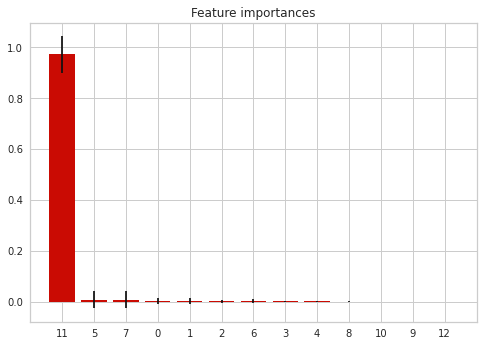

Feature ranking:
1. feature 11 (0.985085)
2. feature 5 (0.003776)
3. feature 1 (0.002928)
4. feature 0 (0.002204)
5. feature 2 (0.001928)
6. feature 3 (0.001199)
7. feature 7 (0.001101)
8. feature 4 (0.000791)
9. feature 6 (0.000654)
10. feature 10 (0.000140)
11. feature 8 (0.000103)
12. feature 9 (0.000090)
13. feature 12 (0.000000)


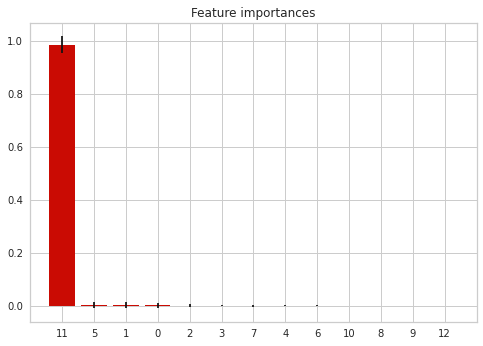

Feature ranking:
1. feature 11 (0.971012)
2. feature 5 (0.007689)
3. feature 1 (0.006125)
4. feature 6 (0.005682)
5. feature 0 (0.002880)
6. feature 7 (0.002350)
7. feature 2 (0.002197)
8. feature 3 (0.000895)
9. feature 4 (0.000755)
10. feature 10 (0.000194)
11. feature 8 (0.000135)
12. feature 9 (0.000086)
13. feature 12 (0.000000)


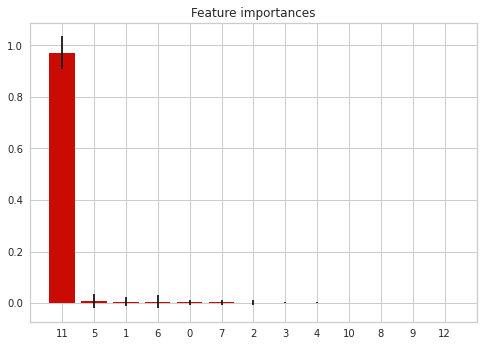

In [28]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(len(unique_values))
representation_percentage = np.zeros(len(unique_values))
# Loop through the clusters
for index, item in enumerate(unique_values):
    df = X_train.loc[X_train['ClusterID'] == item]
    locations = df.shape[0]
    df_purchase = df.loc[df['Purchase'] == 1]
    purchase = df_purchase.shape[0]
    representation_percentage[index] = (locations / X_train.shape[0]) * 100 
    purchase_percentage[index] = (purchase / locations) * 100
    return_feature_rank_from_RF(df,df['Purchase'])

In [29]:
print('purchase percentage: ', purchase_percentage)
print('rep_perc ', representation_percentage)

purchase percentage:  [12.36824468 11.96333025 11.87896854]
rep_perc  [32.826  34.1644 33.0096]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Representation Percentage= [32.826  34.1644 33.0096]
Purchase Percentage= [12.36824468 11.96333025 11.87896854]


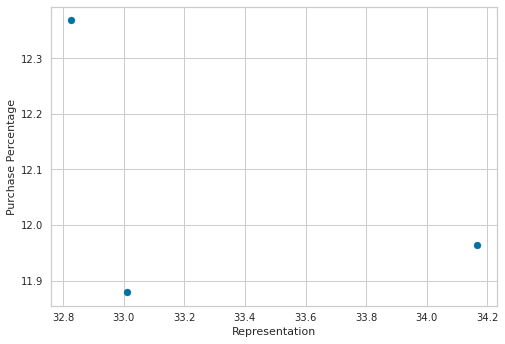

In [30]:
print('Representation Percentage=',(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [31]:
print(np.sum(purchase_percentage))

36.210543476778454


In [32]:
total_purchase=X_train.loc[X_train['Purchase']==1]

In [33]:
purchase_distrib=total_purchase.shape[0]/X_train.shape[0]
print(purchase_distrib*100)

12.0684


/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

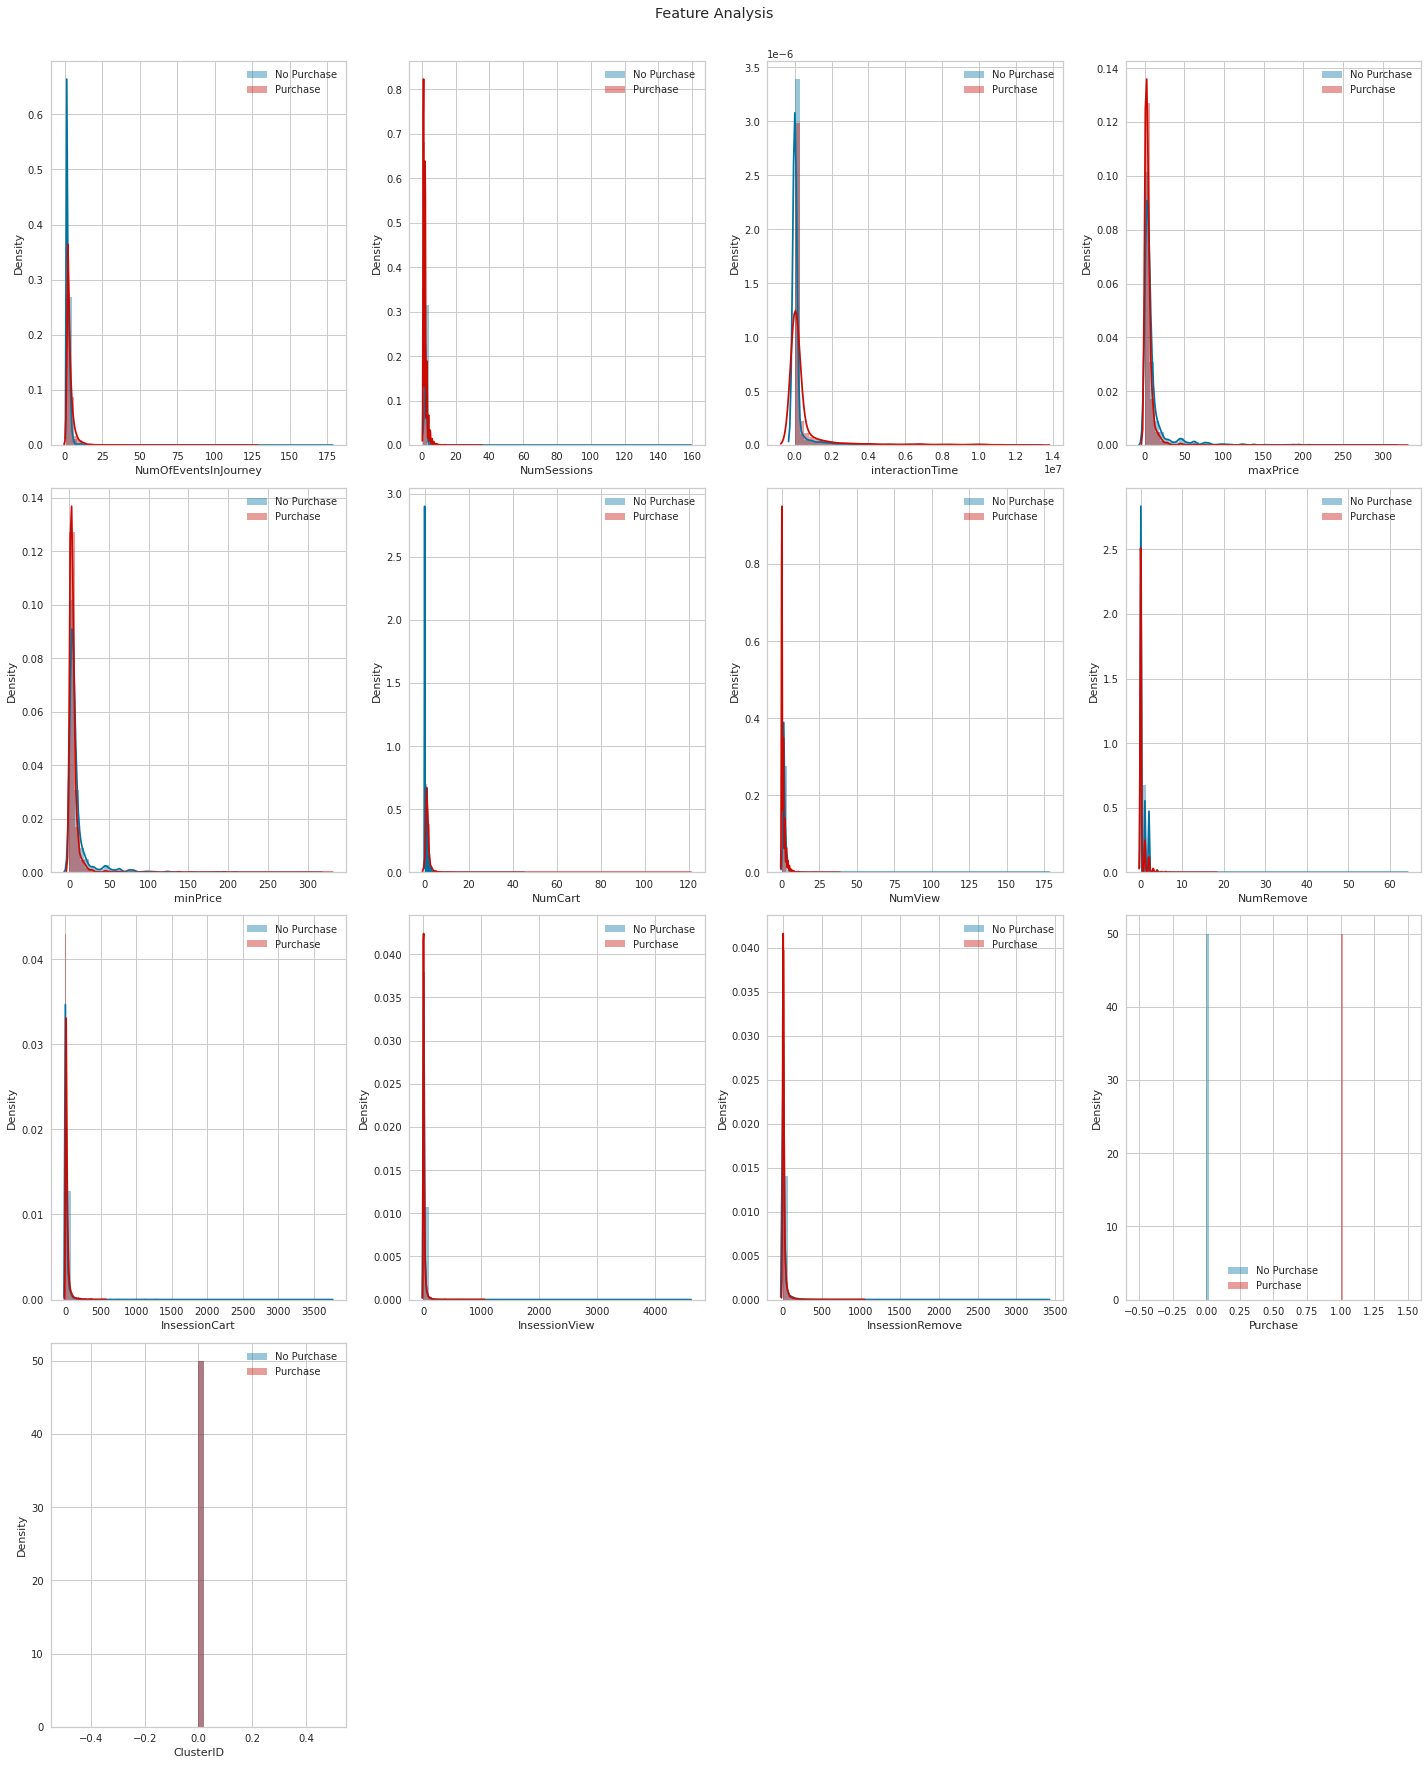

In [34]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_train.loc[X_train['ClusterID'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

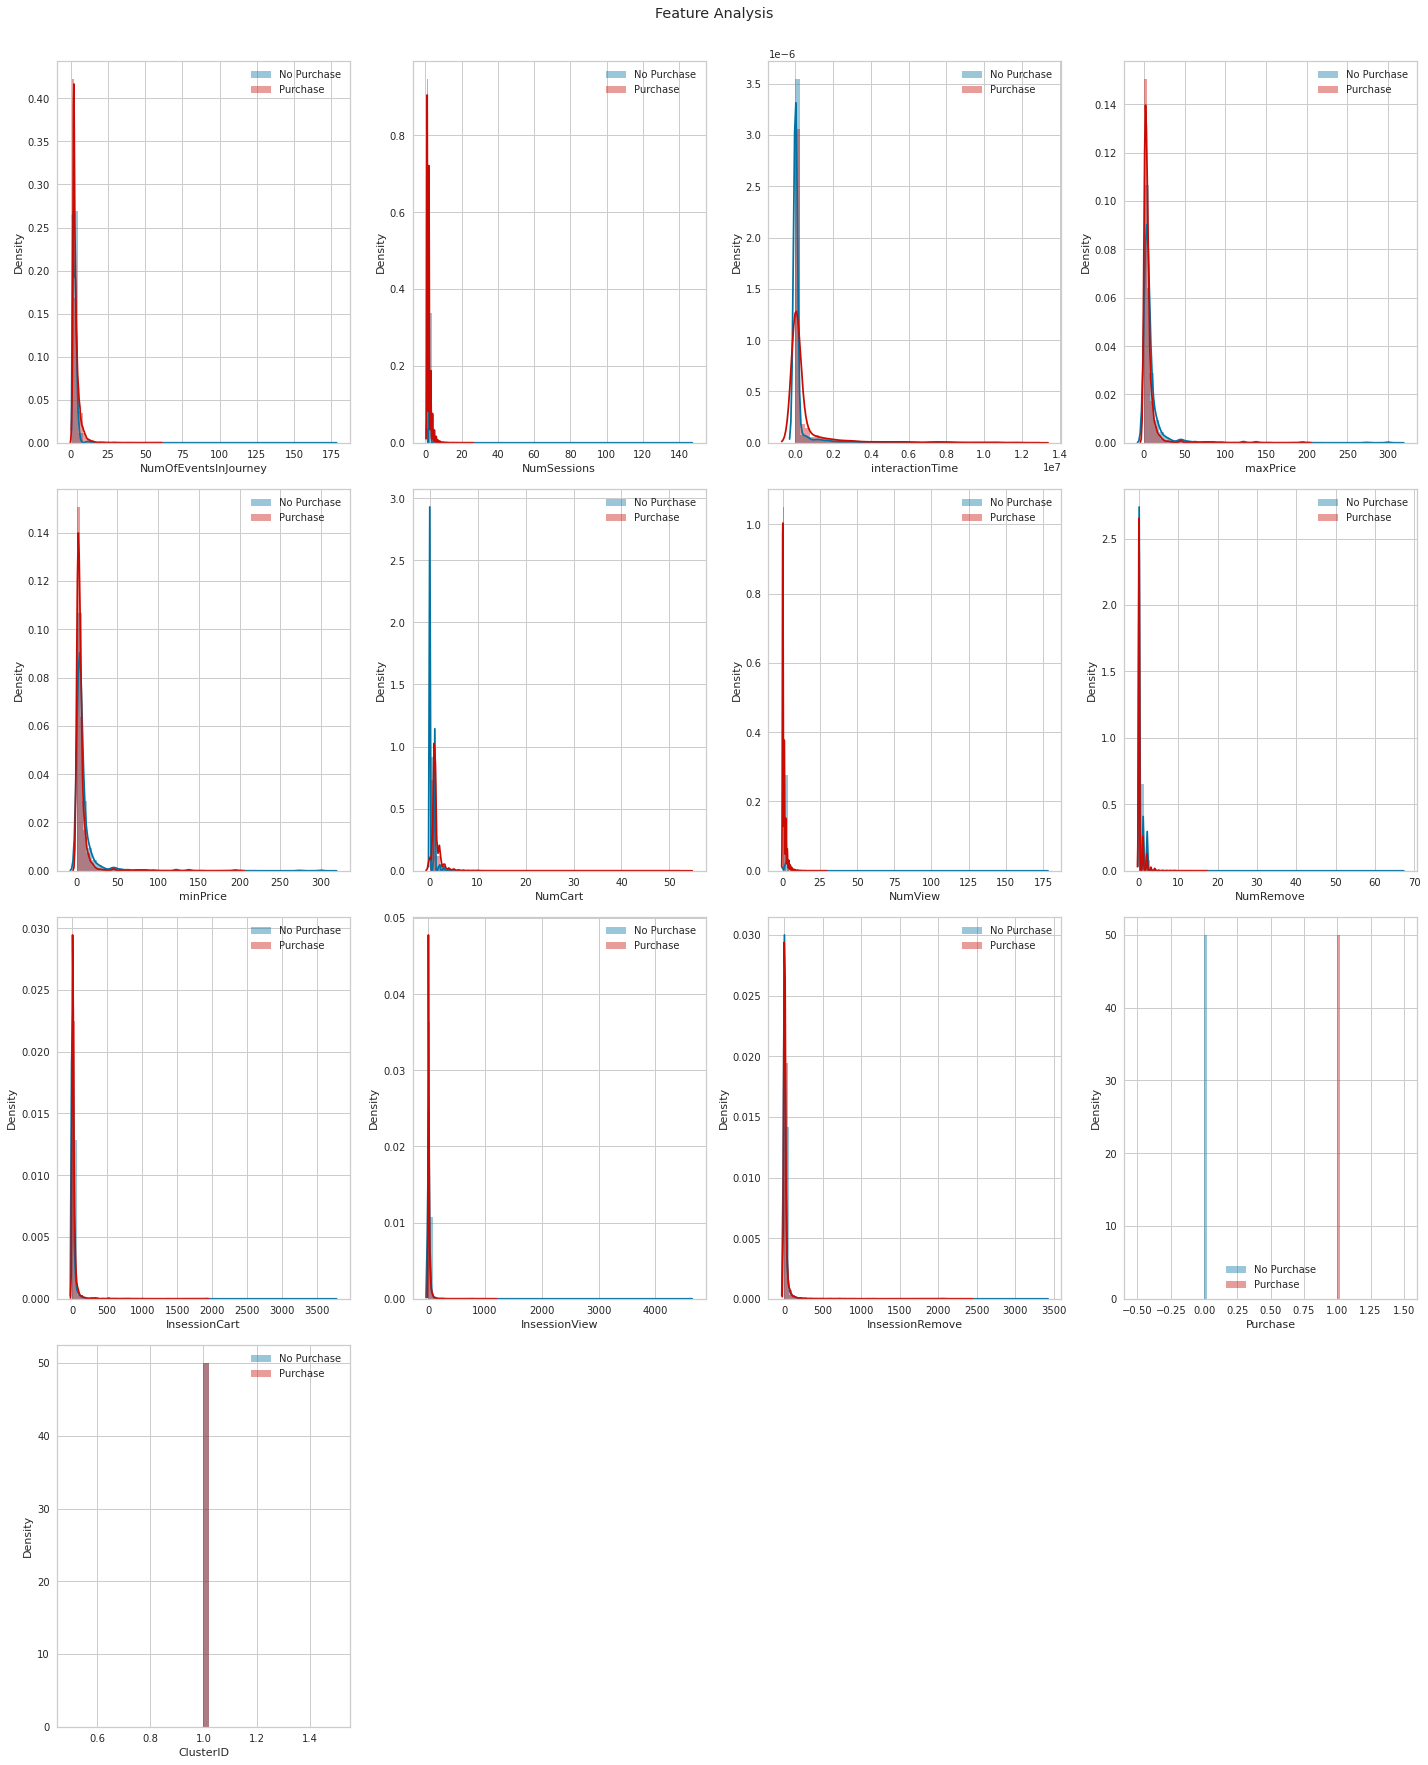

In [35]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_train.loc[X_train['ClusterID'] == 1]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

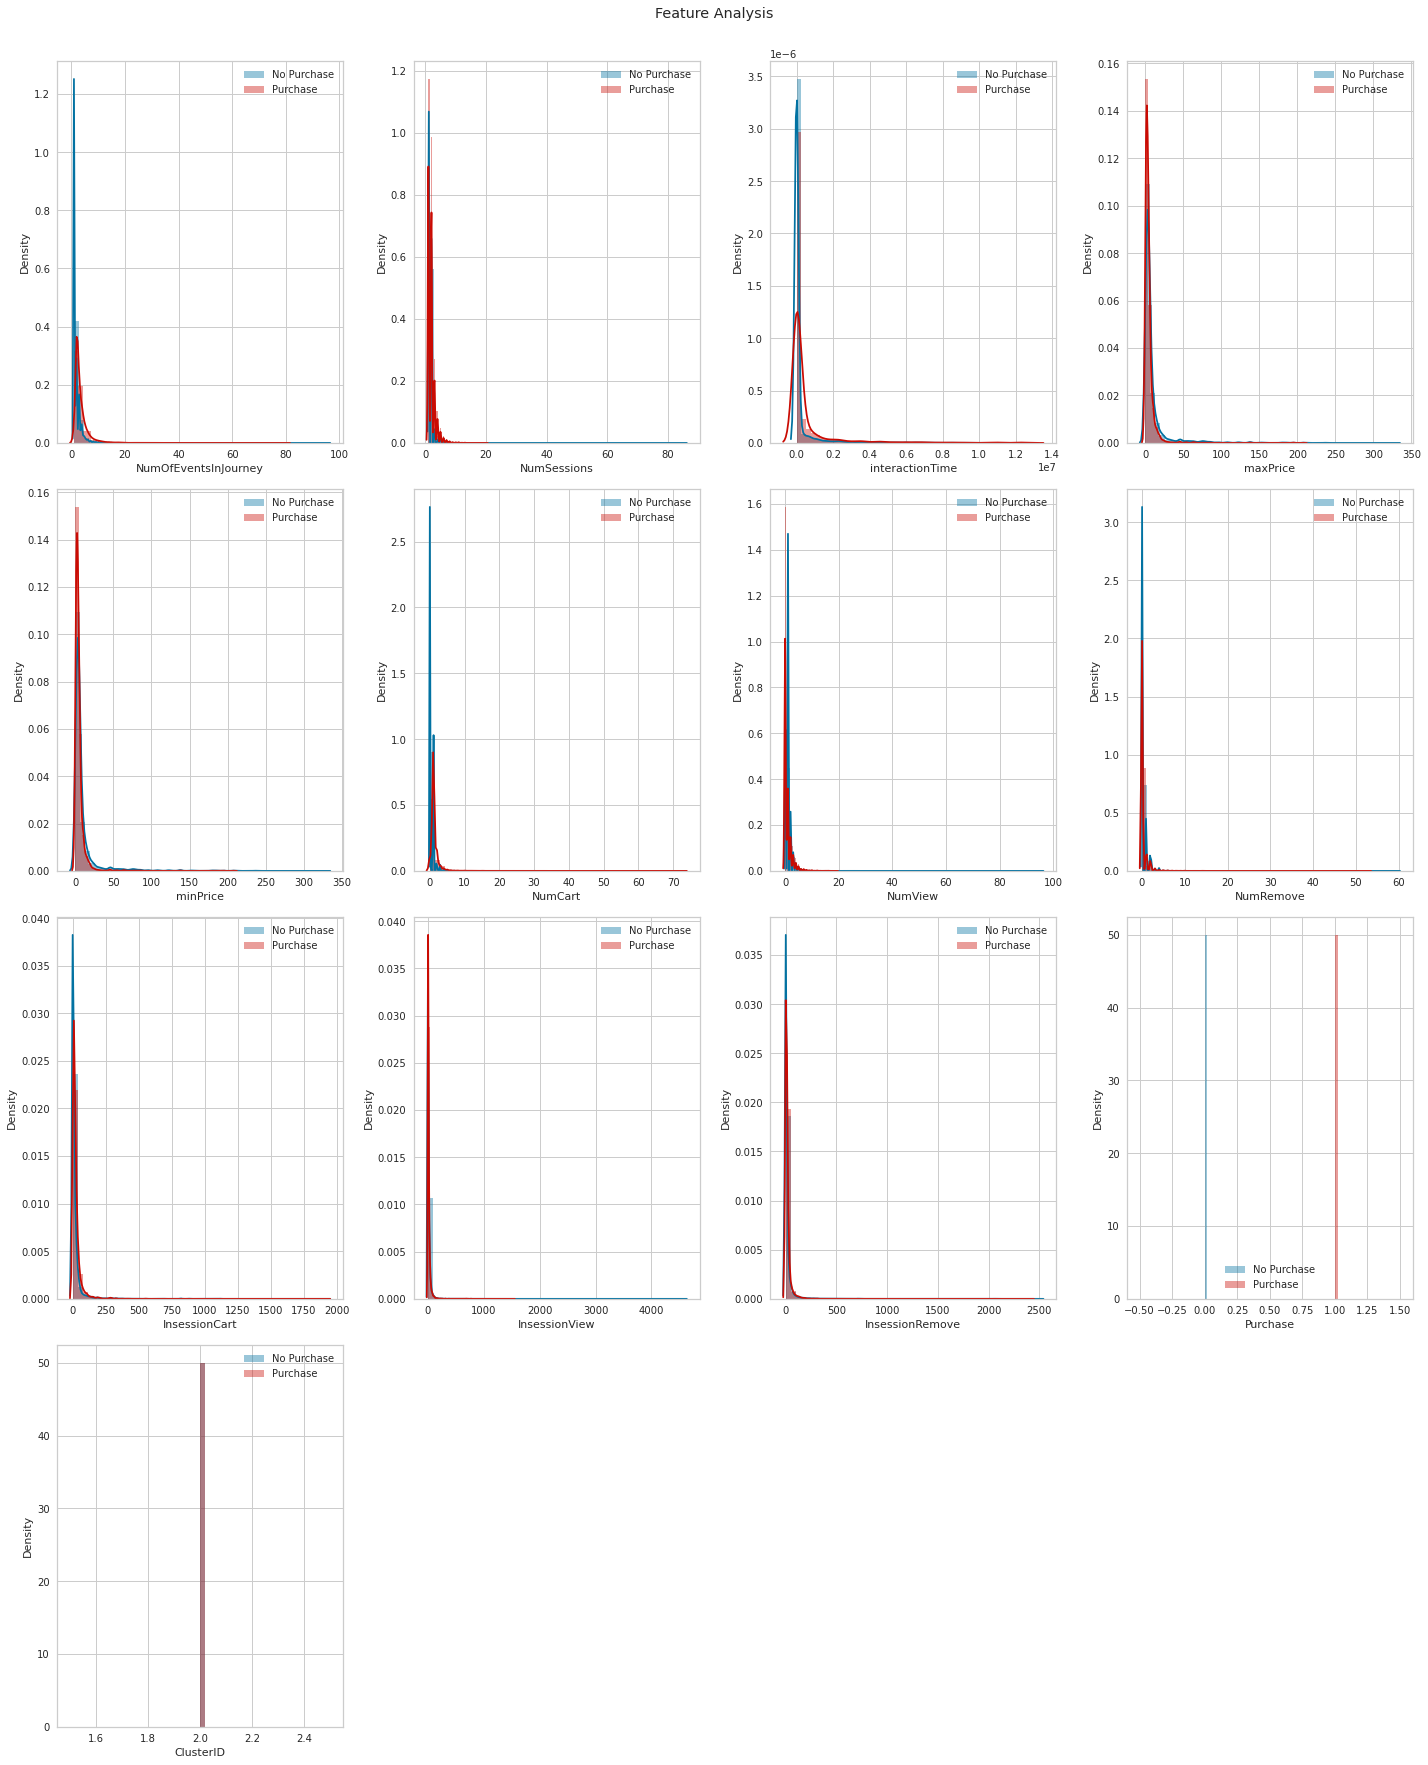

In [36]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_train.loc[X_train['ClusterID'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [37]:
print('Feature 5 ', df.columns[5])
print('Feature 7 ', df.columns[7])
print('Feature 1 ', df.columns[1])

Feature 5  NumCart
Feature 7  NumRemove
Feature 1  NumSessions
